Import file csv dataset, Kolom hanya terdiri dari text, dan kategori<br>

In [2]:
import pandas as pd
import re
df_dataset = pd.read_csv('newdataset.csv')

Penghitungan bintang tiap kategori

In [3]:
df_dataset.star.value_counts()

1    38624
0    16228
Name: star, dtype: int64

Penghilangan simbol, angka, ke huruf kecil, stopword removal

In [4]:
clean_tweets = []
for tweet in df_dataset['text']:
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)|(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ",str(tweet)).split())
    clean_tweets.append(tweet)
df_dataset['text'] = clean_tweets
clean_tweets = []
for tweet in df_dataset['text']:
    tweet = ' '.join(re.sub("\d+"," ",str(tweet)).split())
    clean_tweets.append(tweet)
df_dataset['text'] = clean_tweets
clean_tweets = []
for tweet in df_dataset['text']:
    clean_tweets.append(tweet.lower())
df_dataset['text'] = clean_tweets
stopwords = ["ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir", "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar", "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya", "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai", "bagaikan", "bagaimana", "bagaimanakah", "bagaimanapun", "bagi", "bagian", "bahkan", "bahwa", "bahwasanya", "baik", "bakal", "bakalan", "balik", "banyak", "bapak", "baru", "bawah", "beberapa", "begini", "beginian", "beginikah", "beginilah", "begitu", "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan", "belum", "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah", "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal", "berbagai", "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah", "berkali-kali", "berkata", "berkehendak", "berkeinginan", "berkenaan", "berlainan", "berlalu", "berlangsung", "berlebihan", "bermacam", "bermacam-macam", "bermaksud", "bermula", "bersama", "bersama-sama", "bersiap", "bersiap-siap", "bertanya", "bertanya-tanya", "berturut", "berturut-turut", "bertutur", "berujar", "berupa", "besar", "betul", "betulkah", "biasa", "biasanya", "bila", "bilakah", "bisa", "bisakah", "boleh", "bolehkah", "bolehlah", "buat", "bukan", "bukankah", "bukanlah", "bukannya", "bulan", "bung", "cara", "caranya", "cukup", "cukupkah", "cukuplah", "cuma", "dahulu", "dalam", "dan", "dapat", "dari", "daripada", "datang", "dekat", "demi", "demikian", "demikianlah", "dengan", "depan", "di", "dia", "diakhiri", "diakhirinya", "dialah", "diantara", "diantaranya", "diberi", "diberikan", "diberikannya", "dibuat", "dibuatnya", "didapat", "didatangkan", "digunakan", "diibaratkan", "diibaratkannya", "diingat", "diingatkan", "diinginkan", "dijawab", "dijelaskan", "dijelaskannya", "dikarenakan", "dikatakan", "dikatakannya", "dikerjakan", "diketahui", "diketahuinya", "dikira", "dilakukan", "dilalui", "dilihat", "dimaksud", "dimaksudkan", "dimaksudkannya", "dimaksudnya", "diminta", "dimintai", "dimisalkan", "dimulai", "dimulailah", "dimulainya", "dimungkinkan", "dini", "dipastikan", "diperbuat", "diperbuatnya", "dipergunakan", "diperkirakan", "diperlihatkan", "diperlukan", "diperlukannya", "dipersoalkan", "dipertanyakan", "dipunyai", "diri", "dirinya", "disampaikan", "disebut", "disebutkan", "disebutkannya", "disini", "disinilah", "ditambahkan", "ditandaskan", "ditanya", "ditanyai", "ditanyakan", "ditegaskan", "ditujukan", "ditunjuk", "ditunjuki", "ditunjukkan", "ditunjukkannya", "ditunjuknya", "dituturkan", "dituturkannya", "diucapkan", "diucapkannya", "diungkapkan", "dong", "dua", "dulu", "empat", "enggak", "enggaknya", "entah", "entahlah", "guna", "gunakan", "hal", "hampir", "hanya", "hanyalah", "hari", "harus", "haruslah", "harusnya", "hendak", "hendaklah", "hendaknya", "hingga", "ia", "ialah", "ibarat", "ibaratkan", "ibaratnya", "ibu", "ikut", "ingat", "ingat-ingat", "ingin", "inginkah", "inginkan", "ini", "inikah", "inilah", "itu", "itukah", "itulah", "jadi", "jadilah", "jadinya", "jangan", "jangankan", "janganlah", "jauh", "jawab", "jawaban", "jawabnya", "jelas", "jelaskan", "jelaslah", "jelasnya", "jika", "jikalau", "juga", "jumlah", "jumlahnya", "justru", "kala", "kalau", "kalaulah", "kalaupun", "kalian", "kami", "kamilah", "kamu", "kamulah", "kan", "kapan", "kapankah", "kapanpun", "karena", "karenanya", "kasus", "kata", "katakan", "katakanlah", "katanya", "ke", "keadaan", "kebetulan", "kecil", "kedua", "keduanya", "keinginan", "kelamaan", "kelihatan", "kelihatannya", "kelima", "keluar", "kembali", "kemudian", "kemungkinan", "kemungkinannya", "kenapa", "kepada", "kepadanya", "kesampaian", "keseluruhan", "keseluruhannya", "keterlaluan", "ketika", "khususnya", "kini", "kinilah", "kira", "kira-kira", "kiranya", "kita", "kitalah", "kok", "kurang", "lagi", "lagian", "lah", "lain", "lainnya", "lalu", "lama", "lamanya", "lanjut", "lanjutnya", "lebih", "lewat", "lima", "luar", "macam", "maka", "makanya", "makin", "malah", "malahan", "mampu", "mampukah", "mana", "manakala", "manalagi", "masa", "masalah", "masalahnya", "masih", "masihkah", "masing", "masing-masing", "mau", "maupun", "melainkan", "melakukan", "melalui", "melihat", "melihatnya", "memang", "memastikan", "memberi", "memberikan", "membuat", "memerlukan", "memihak", "meminta", "memintakan", "memisalkan", "memperbuat", "mempergunakan", "memperkirakan", "memperlihatkan", "mempersiapkan", "mempersoalkan", "mempertanyakan", "mempunyai", "memulai", "memungkinkan", "menaiki", "menambahkan", "menandaskan", "menanti", "menanti-nanti", "menantikan", "menanya", "menanyai", "menanyakan", "mendapat", "mendapatkan", "mendatang", "mendatangi", "mendatangkan", "menegaskan", "mengakhiri", "mengapa", "mengatakan", "mengatakannya", "mengenai", "mengerjakan", "mengetahui", "menggunakan", "menghendaki", "mengibaratkan", "mengibaratkannya", "mengingat", "mengingatkan", "menginginkan", "mengira", "mengucapkan", "mengucapkannya", "mengungkapkan", "menjadi", "menjawab", "menjelaskan", "menuju", "menunjuk", "menunjuki", "menunjukkan", "menunjuknya", "menurut", "menuturkan", "menyampaikan", "menyangkut", "menyatakan", "menyebutkan", "menyeluruh", "menyiapkan", "merasa", "mereka", "merekalah", "merupakan", "meski", "meskipun", "meyakini", "meyakinkan", "minta", "mirip", "misal", "misalkan", "misalnya", "mula", "mulai", "mulailah", "mulanya", "mungkin", "mungkinkah", "nah", "naik", "namun", "nanti", "nantinya", "nyaris", "nyatanya", "oleh", "olehnya", "pada", "padahal", "padanya", "pak", "paling", "panjang", "pantas", "para", "pasti", "pastilah", "penting", "pentingnya", "per", "percuma", "perlu", "perlukah", "perlunya", "pernah", "persoalan", "pertama", "pertama-tama", "pertanyaan", "pertanyakan", "pihak", "pihaknya", "pukul", "pula", "pun", "punya", "rasa", "rasanya", "rata", "rupanya", "saat", "saatnya", "saja", "sajalah", "saling", "sama", "sama-sama", "sambil", "sampai", "sampai-sampai", "sampaikan", "sana", "sangat", "sangatlah", "satu", "saya", "sayalah", "se", "sebab", "sebabnya", "sebagai", "sebagaimana", "sebagainya", "sebagian", "sebaik", "sebaik-baiknya", "sebaiknya", "sebaliknya", "sebanyak", "sebegini", "sebegitu", "sebelum", "sebelumnya", "sebenarnya", "seberapa", "sebesar", "sebetulnya", "sebisanya", "sebuah", "sebut", "sebutlah", "sebutnya", "secara", "secukupnya", "sedang", "sedangkan", "sedemikian", "sedikit", "sedikitnya", "seenaknya", "segala", "segalanya", "segera", "seharusnya", "sehingga", "seingat", "sejak", "sejauh", "sejenak", "sejumlah", "sekadar", "sekadarnya", "sekali", "sekali-kali", "sekalian", "sekaligus", "sekalipun", "sekarang", "sekarang", "sekecil", "seketika", "sekiranya", "sekitar", "sekitarnya", "sekurang-kurangnya", "sekurangnya", "sela", "selain", "selaku", "selalu", "selama", "selama-lamanya", "selamanya", "selanjutnya", "seluruh", "seluruhnya", "semacam", "semakin", "semampu", "semampunya", "semasa", "semasih", "semata", "semata-mata", "semaunya", "sementara", "semisal", "semisalnya", "sempat", "semua", "semuanya", "semula", "sendiri", "sendirian", "sendirinya", "seolah", "seolah-olah", "seorang", "sepanjang", "sepantasnya", "sepantasnyalah", "seperlunya", "seperti", "sepertinya", "sepihak", "sering", "seringnya", "serta", "serupa", "sesaat", "sesama", "sesampai", "sesegera", "sesekali", "seseorang", "sesuatu", "sesuatunya", "sesudah", "sesudahnya", "setelah", "setempat", "setengah", "seterusnya", "setiap", "setiba", "setibanya", "setidak-tidaknya", "setidaknya", "setinggi", "seusai", "sewaktu", "siap", "siapa", "siapakah", "siapapun", "sini", "sinilah", "soal", "soalnya", "suatu", "sudah", "sudahkah", "sudahlah", "supaya", "tadi", "tadinya", "tahu", "tahun", "tak", "tambah", "tambahnya", "tampak", "tampaknya", "tandas", "tandasnya", "tanpa", "tanya", "tanyakan", "tanyanya", "tapi", "tegas", "tegasnya", "telah", "tempat", "tengah", "tentang", "tentu", "tentulah", "tentunya", "tepat", "terakhir", "terasa", "terbanyak", "terdahulu", "terdapat", "terdiri", "terhadap", "terhadapnya", "teringat", "teringat-ingat", "terjadi", "terjadilah", "terjadinya", "terkira", "terlalu", "terlebih", "terlihat", "termasuk", "ternyata", "tersampaikan", "tersebut", "tersebutlah", "tertentu", "tertuju", "terus", "terutama", "tetap", "tetapi", "tiap", "tiba", "tiba-tiba", "tidak", "tidakkah", "tidaklah", "tiga", "tinggi", "toh", "tunjuk", "turut", "tutur", "tuturnya", "ucap", "ucapnya", "ujar", "ujarnya", "umum", "umumnya", "ungkap", "ungkapnya", "untuk", "usah", "usai", "waduh", "wah", "wahai", "waktu", "waktunya", "walau", "walaupun", "wong", "yaitu", "yakin", "yakni", "yang", "yg", "dg", "rt", "dgn", "ny", "d", "klo", "kalo", "amp", "biar", "bikin", "bilang", "gak", "ga", "krn", "nya", "nih", "sih", "si", "tau", "tdk", "tuh", "utk", "ya", "jd", "jgn", "sdh", "aja", "n", "t", "nyg", "hehe", "pen", "u", "nan", "loh", "rt", "&amp", "yah"]
clean_tweets = []
for tweet in df_dataset['text']:
    for word in stopwords:
        token = " " + word + " "
        tweet = tweet.replace(token, " ")
        tweet = tweet.replace("  ", " ")
    clean_tweets.append(tweet)
df_dataset['text'] = clean_tweets

Drop duplicate dibawahnya jika ada dobel dan simpan index teratas

In [5]:
df_dataset.drop_duplicates(subset ="text", keep = 'first', inplace = True)

Drop length kurang dari 3

In [6]:
df_dataset = df_dataset[df_dataset.text.str.len() > 3]

In [7]:
df_dataset.star.value_counts()

1    30325
0    13031
Name: star, dtype: int64

In [8]:
FEATURES = 'text'
TARGET = 'star'

FEATURES, TARGET

('text', 'star')

In [10]:
import pandas as pd
df = pd.DataFrame()
df[FEATURES] = df_dataset['text']
df[TARGET] = df_dataset['star']

df.sample(10)

,text,star
27851,tempatnya keren bagus foto instagramable coba ...,1
3729,bukan harapkan,1
54340,pros karyawan akomodatif tempatnya bersih kama...,0
19754,yang butuh oksigen kesini memanjakan mata berk...,1
35827,tempatnya luas jualan suvernir menyewakan ban ...,1
31404,indah menarik instagram able sayang arena berm...,1
5355,walau pembangunan enak jalan jalan sore,1
52961,perawatan bersih rindang,0
15038,bagus rapi wisatanya,1
17077,sayang pas dateng penyu renovasi overall lumay...,1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[FEATURES],
    df[TARGET],
    test_size=0.1,
    random_state=45)

y_train.groupby(y_train).count()

star
0    11776
1    27244
Name: star, dtype: int64

In [14]:
y_test.groupby(y_test).count()

star
0    1255
1    3081
Name: star, dtype: int64

In [15]:
import numpy as np

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s in X_train:
  training_sentences.append(s)
for s in y_train:
  training_labels.append(s)
for s in X_test:
  testing_sentences.append(s)
for s in y_test:
  testing_labels.append(s)
  

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? bagus banget malem
bagus banget malem


In [18]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
dropout (Dropout)            (None, 120, 16)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 64)           5184      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [19]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),verbose=2)

Epoch 1/10
1220/1220 - 33s - loss: 0.4896 - accuracy: 0.7713 - val_loss: 0.4310 - val_accuracy: 0.8100
Epoch 2/10
1220/1220 - 30s - loss: 0.4118 - accuracy: 0.8183 - val_loss: 0.4303 - val_accuracy: 0.8074
Epoch 3/10
1220/1220 - 30s - loss: 0.3757 - accuracy: 0.8391 - val_loss: 0.4548 - val_accuracy: 0.8097
Epoch 4/10
1220/1220 - 30s - loss: 0.3411 - accuracy: 0.8560 - val_loss: 0.4750 - val_accuracy: 0.8010
Epoch 5/10
1220/1220 - 32s - loss: 0.3076 - accuracy: 0.8713 - val_loss: 0.5099 - val_accuracy: 0.7952
Epoch 6/10
1220/1220 - 31s - loss: 0.2796 - accuracy: 0.8833 - val_loss: 0.5323 - val_accuracy: 0.7924
Epoch 7/10
1220/1220 - 31s - loss: 0.2578 - accuracy: 0.8933 - val_loss: 0.5885 - val_accuracy: 0.7904
Epoch 8/10
1220/1220 - 31s - loss: 0.2399 - accuracy: 0.8995 - val_loss: 0.6234 - val_accuracy: 0.7837
Epoch 9/10
1220/1220 - 32s - loss: 0.2265 - accuracy: 0.9041 - val_loss: 0.6458 - val_accuracy: 0.7786
Epoch 10/10
1220/1220 - 32s - loss: 0.2130 - accuracy: 0.9105 - val_loss:

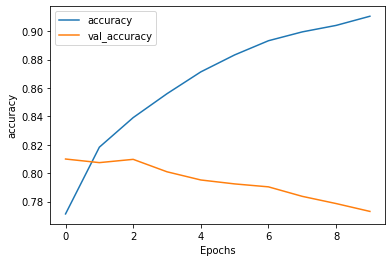

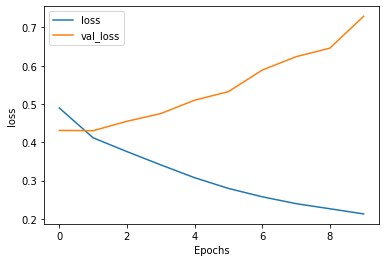

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
print((model.predict(pad_sequences(tokenizer.texts_to_sequences(['kotor']),maxlen=max_length))))

[[0.0699856]]


Drop length kurang dari 3

In [22]:
RPS_SAVED_MODEL = "rps_saved_model"

In [23]:
tf.saved_model.save(model, RPS_SAVED_MODEL)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: rps_saved_model/assets


INFO:tensorflow:Assets written to: rps_saved_model/assets


In [24]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['embedding_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 120)
      name: serving_default_embedding_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [25]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [26]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'embedding_input': TensorSpec(shape=(None, 120), dtype=tf.float32, name='embedding_input')})
{'dense': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense')}


In [27]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = []
converter.post_training_quantize=True
converter.allow_custom_ops=False
tflite_model = converter.convert()

In [28]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [29]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('converted_model.tflite')
  # files.download('ready.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classify crawled data

In [ ]:
import pandas as pd
df_tweet = pd.read_csv('alldatacleaneddropdupli.csv')
df_tweet = df_tweet[df_tweet.full_text.str.len() > 3]
cate_tweets = []
for tweet in df_tweet['full_text']:
    # cate_tweets.append(tweet.lower())
    cate_tweets.append(int((model.predict(pad_sequences(tokenizer.texts_to_sequences([tweet]),maxlen=max_length))).round()[0][0]))
df_tweet['star'] = cate_tweets
df_tweet.to_csv('ready.csv',index=False)

,full_text,user_full_name,nama_tempat,id_kategori,star
0,di suatu sudut Kebun Raya Purwodadi,GHarWish,Kebun Raya Purwodadi,3,0
1,free falling Kebun Raya Purwodadi,GHarWish,Kebun Raya Purwodadi,3,1
2,Kebun Raya Purwodadi terletak di pasuruan dan ...,Jelajah Jawa Timur,Kebun Raya Purwodadi,3,1
3,Coban Jolo adalah salah satu air terjun di Pas...,Jelajah Jawa Timur,Kebun Raya Purwodadi,3,1
4,Ingin melihat dari ketinggian Purwodadi dan ku...,Kebun Raya,Kebun Raya Purwodadi,3,1
...,...,...,...,...,...
30364,Pantai Teluk Penyu Sore hari kepengen sepedaan...,Disporapar Cilacap,Teluk Penyu,1,1
30365,Dermaga 3 Lokasinya berada di ujung utara Pant...,Disporapar Cilacap,Teluk Penyu,1,1
30366,Photography by nuke hergiswil Pantai teluk pen...,The Bay Area,Teluk Penyu,1,1
30367,With Muhammad Aldy at Pantai Teluk Penyu,unknown.,Teluk Penyu,1,0
